In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import gzip
import sqlite3
import csv
import numpy as np
import seaborn as sns

In [63]:
df1 = pd.read_csv('bom.movie_gross.csv.gz')
df1 = df1.rename(columns = {'title':'movie'})

In [64]:
df2 = pd.read_csv('imdb.name.basics.csv.gz')

In [65]:
df3 = pd.read_csv('imdb.title.akas.csv.gz')
df3 = df3.rename(columns = {'title':'movie'})

In [66]:
df4 = pd.read_csv('imdb.title.basics.csv.gz')
df4 = df4.rename(columns = {'primary_title':'movie'})

In [67]:
df5 = pd.read_csv('imdb.title.crew.csv.gz')

In [68]:
df6 = pd.read_csv('imdb.title.principals.csv.gz')

In [69]:
df7 = pd.read_csv('imdb.title.ratings.csv.gz')

In [70]:
df8 = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')

In [71]:
df9 = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='windows-1254')
con9 = sqlite3.connect('rt.reviews.tsv.gz')
df9 = df9.set_index('id')

In [72]:
df10 = pd.read_csv('tmdb.movies.csv.gz')
con10 = sqlite3.connect('tmdb.movies.csv.gz')
df10 = df10.set_index(['Unnamed: 0'])
df10 = df10.rename(columns = {'title':'movie'})
df10['movie'] = str(df10['movie'])

In [73]:
df11 = pd.read_csv('tn.movie_budgets.csv.gz')
df11['worldwide_gross'] = df11['worldwide_gross'].str[1:]
df11['worldwide_gross'] = df11['worldwide_gross'].str.replace(',', '').astype(np.int64)
df11['domestic_gross'] = df11['domestic_gross'].str[1:]
df11['domestic_gross'] = df11['domestic_gross'].str.replace(',', '').astype(np.int64)
df11['production_budget'] = df11['production_budget'].str[1:]
df11['production_budget'] = df11['production_budget'].str.replace(',', '').astype(np.int64)

In [74]:
print('DF1:', df1.columns, '\n')
print('DF3: ', df3.columns, '\n')
print('DF4: ', df4.columns, '\n')
print('DF7: ', df7.columns, '\n')
print('DF8: ', df8.columns, '\n')
print('DF9: ', df9.columns, '\n')
print('DF10: ', df10.columns, '\n')
print('DF11: ', df11.columns, '\n')

DF1: Index(['movie', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object') 

DF3:  Index(['title_id', 'ordering', 'movie', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object') 

DF4:  Index(['tconst', 'movie', 'original_title', 'start_year', 'runtime_minutes',
       'genres'],
      dtype='object') 

DF7:  Index(['tconst', 'averagerating', 'numvotes'], dtype='object') 

DF8:  Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object') 

DF9:  Index(['review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object') 

DF10:  Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'movie', 'vote_average', 'vote_count'],
      dtype='object') 

DF11:  Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
     

In [75]:
production = df11[df11.production_budget < 1000000].index

In [76]:
df11.drop(production, inplace=True)

In [77]:
domestic = df11[df11.domestic_gross < 1].index

In [78]:
df11.drop(domestic, inplace=True)

In [79]:
worldwide = df11[df11.worldwide_gross < 1].index
df11.drop(worldwide, inplace=True)

In [80]:
df11.set_index('movie')

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747
...,...,...,...,...,...
Sparkler,95,"Mar 19, 1999",1000000,5494,5494
The Helixâ¦Loaded,96,"Mar 18, 2005",1000000,3700,3700
Childless,97,"May 15, 2015",1000000,1036,1036


In [81]:
BigFrame = df11.merge(df1, on='movie').merge(df4, on='movie').drop(columns=['tconst', 'original_title', 'start_year', 'id', 'domestic_gross_y'])

In [82]:
BigFrame = BigFrame.drop_duplicates(subset='movie').set_index('movie')
BigFrame.keys()

Index(['release_date', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'studio', 'foreign_gross', 'year', 'runtime_minutes',
       'genres'],
      dtype='object')

In [83]:
BigFrame.head()

,release_date,production_budget,domestic_gross_x,worldwide_gross,studio,foreign_gross,year,runtime_minutes,genres
movie,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000,241063875,1045663875,BV,804600000,2011,136.0,"Action,Adventure,Fantasy"
Avengers: Age of Ultron,"May 1, 2015",330600000,459005868,1403013963,BV,946400000,2015,141.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War,"Apr 27, 2018",300000000,678815482,2048134200,BV,"1,369.5",2018,149.0,"Action,Adventure,Sci-Fi"
Justice League,"Nov 17, 2017",300000000,229024295,655945209,WB,428900000,2017,120.0,"Action,Adventure,Fantasy"
Spectre,"Nov 6, 2015",300000000,200074175,879620923,Sony,680600000,2015,148.0,"Action,Adventure,Thriller"


In [84]:
df8mask = df8.drop(columns=['director', 'writer', 'studio', 'synopsis', 'id'])
df8mask = df8mask.dropna()
df8mask['box_office'] = df8mask['box_office'].str.replace(',', '').astype(int)
df8mask = df8mask.set_index('box_office')
df8mask = df8mask.sort_index(ascending=False)
genre = df8mask.iloc[:12]['genre'].values
boxoffice = df8mask.iloc[:12]['genre'].index

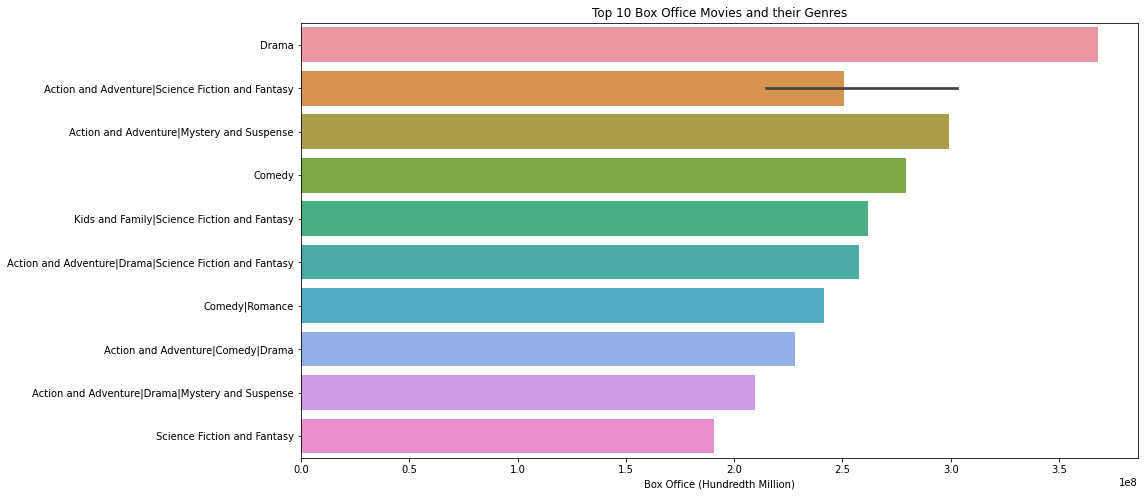

In [85]:
plt.style.use('seaborn-bright')
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=boxoffice, y=genre);
ax.set_title('Top 10 Box Office Movies and their Genres')
ax.set_xlabel('Box Office (Hundredth Million)');

In [86]:
df8mask = df8mask.sort_index(ascending=True)
genre2 = df8mask.iloc[:12]['genre'].values
boxoffice2 = df8mask.iloc[:12]['genre'].index

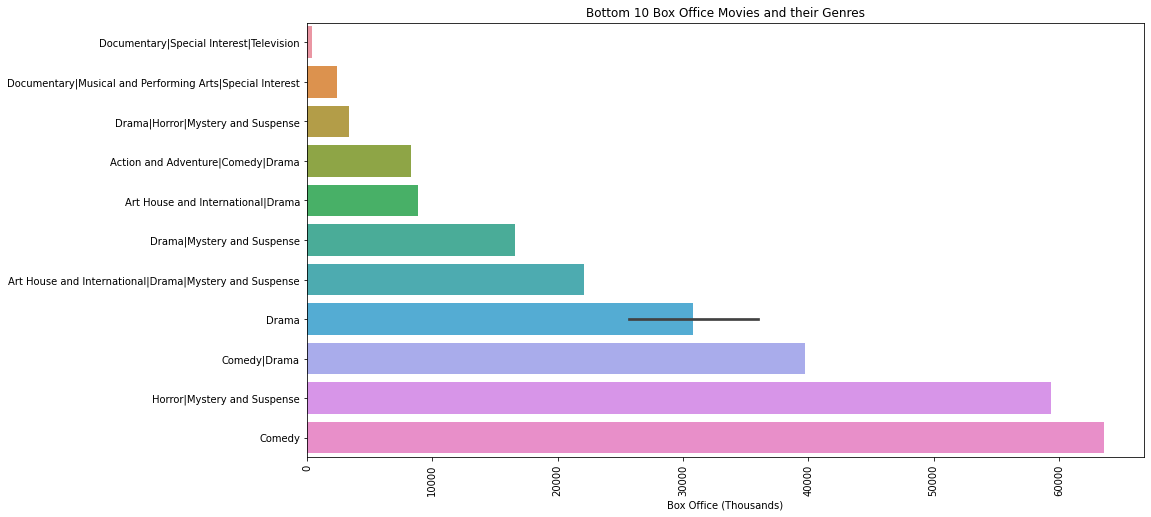

In [87]:
plt.style.use('seaborn-bright')
f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=boxoffice2, y=genre2)
ax.tick_params(axis='x', rotation=90);
ax.set_title('Bottom 10 Box Office Movies and their Genres');
ax.set_xlabel('Box Office (Thousands)');

In [90]:
big fram


SyntaxError: invalid syntax (<ipython-input-90-0b8dc3ed0368>, line 1)